## California Housing Prices

### Project

#### Predict median house values in California, given a number of features from these datasets.

## Dataset

In [2]:
import pandas as pd
housing = pd.read_csv('C:/Users/DeLL/Desktop/ml/machine_learning/datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### There are total of 10 attributes.['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']



In [8]:
# The info() method is quite useful to get a quick description of the data.


housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
# Handling missing values

housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace = True)

In [9]:
# Getting the shape of the dataframe

housing.shape  # there are 20640 rows and 10 columns

(20640, 10)

In [10]:
# Get the value_counts() for object column

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [29]:
# Encoding the ocean_proximity column

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
ocean_prox = label.fit_transform(housing['ocean_proximity'])
housing['ocean_proximity'] = ocean_prox
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,3
1,-122.22,37.86,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,3
2,-122.24,37.85,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,3
3,-122.25,37.85,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,3
4,-122.25,37.85,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,3


In [30]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing[['housing_median_age','total_rooms', 'total_bedrooms', 'population',
                             'households', 'median_income', 'median_house_value']] = scaler.fit_transform(housing[['housing_median_age','total_rooms', 'total_bedrooms', 'population',
                                                                                     'households', 'median_income', 'median_house_value']])

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,3
1,-122.22,37.86,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,3
2,-122.24,37.85,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,3
3,-122.25,37.85,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,3
4,-122.25,37.85,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,3


In [32]:
# Checking correlation 

housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.014688
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,0.081750,1.000000


In [33]:
# Plot a histogram to look at the type of data we are dealing with.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

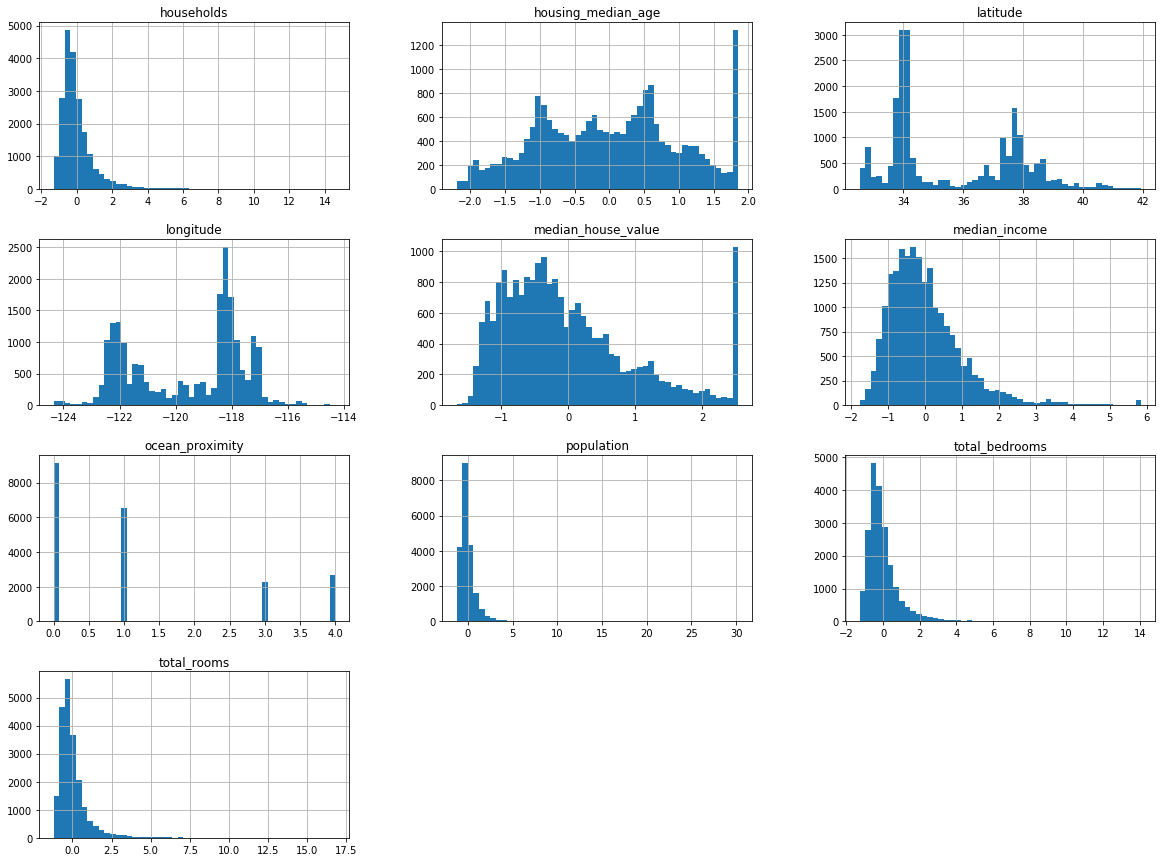

In [34]:
housing.hist(bins=50, figsize = (20,15))
plt.show()

In [37]:
# Getting the target and features

X = housing.drop('median_house_value', axis = 1)
y = housing['median_house_value']

In [38]:
# Dividing the dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Select and train a model

In [39]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred = lin_reg.predict(X_test)
y_pred

array([ 1.5480242 ,  0.62880349,  0.26061083, ...,  0.07523064,
        0.59535651, -0.76494033])

In [52]:
#calculate RMSE

from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6116715610118137

In [60]:
# Using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [61]:
#calculate RMSE

y_pred_tree = tree.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.6022621646467072

In [64]:
# Using RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_test, y_test)

C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [66]:
#calculate RMSE

y_pred_rf = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.22239756235283087

In [67]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [69]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [70]:
# Get the best estimator

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [71]:
# Let's look at the score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5319002867652891 {'max_features': 2, 'n_estimators': 3}
0.4615782287583335 {'max_features': 2, 'n_estimators': 10}
0.44374423637144433 {'max_features': 2, 'n_estimators': 30}
0.5021451303933271 {'max_features': 4, 'n_estimators': 3}
0.4437334006308608 {'max_features': 4, 'n_estimators': 10}
0.42722491548173835 {'max_features': 4, 'n_estimators': 30}
0.5067180119004909 {'max_features': 6, 'n_estimators': 3}
0.4473797047626189 {'max_features': 6, 'n_estimators': 10}
0.42851419645309563 {'max_features': 6, 'n_estimators': 30}
0.4999676780746344 {'max_features': 8, 'n_estimators': 3}
0.44358012471702285 {'max_features': 8, 'n_estimators': 10}
0.4295259178804827 {'max_features': 8, 'n_estimators': 30}
0.52209166548644 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4524879702960885 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.49651877155398894 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4417349947691239 {'bootstrap': False, 'max_features': 3,

In [72]:
# Evaluate model on the Test Set

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.4425685001280421